<a href="https://colab.research.google.com/github/AlidarxD/projects/blob/main/bank_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from urllib.request import urlretrieve
bank_df = pd.read_csv("/content/fraud_dataset.csv")

In [5]:
def fraud_age(x):
  if 31 <= x <= 35:
    return "31-35"
  if 36 <= x <= 40:
    return "36-40"
  if 41 <= x <= 45:
    return "41-45"
  if 46 <= x <= 50:
    return "45-50"
  if x > 51:
    return "51+"

In [7]:
bank_df["agen_dif"] = bank_df["age"].map(fraud_age)
agen_counts = bank_df.groupby(["location", "agen_dif",'fraud_label'])['fraud_label'].count().unstack()
agen_counts

fraud_label               0    1
location      agen_dif          
Chicago       31-35     2.0  1.0
              36-40     2.0  3.0
              41-45     6.0  NaN
              45-50     1.0  NaN
Los Angeles   31-35     5.0  NaN
              36-40     4.0  NaN
              45-50     5.0  NaN
              51+       2.0  NaN
New York      31-35     3.0  NaN
              36-40     1.0  NaN
              41-45     4.0  1.0
              45-50     4.0  NaN
              51+       4.0  NaN
San Francisco 31-35     2.0  NaN
              36-40     2.0  2.0
              41-45     2.0  1.0
              45-50     1.0  5.0
              51+       3.0  NaN

Text(0, 0.5, 'sum of frauds')

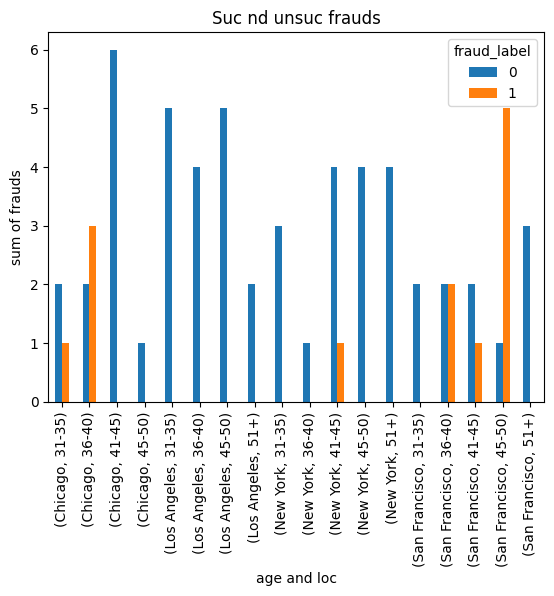

In [10]:
import matplotlib.pyplot as plt
agen_counts.plot.bar()
plt.title("Suc nd unsuc frauds")
plt.xlabel("age and loc")
plt.ylabel("sum of frauds")

In [11]:
transaction_depend_on_age = bank_df.groupby("agen_dif")[["transaction_amount"]].sum()
transaction_depend_on_age

,transaction_amount
agen_dif,
31-35,19100.0
36-40,27900.0
41-45,20750.0
45-50,30440.0
51+,9775.0


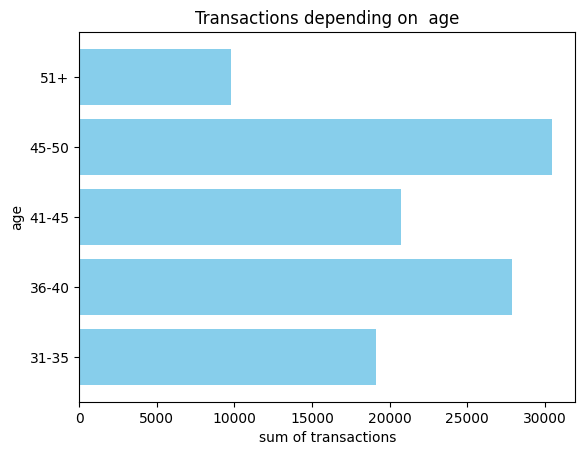

In [12]:
plt.barh(transaction_depend_on_age.index, transaction_depend_on_age["transaction_amount"],color='skyblue')
plt.xlabel("sum of transactions")
plt.ylabel("age")
plt.title("Transactions depending on  age")
plt.show()

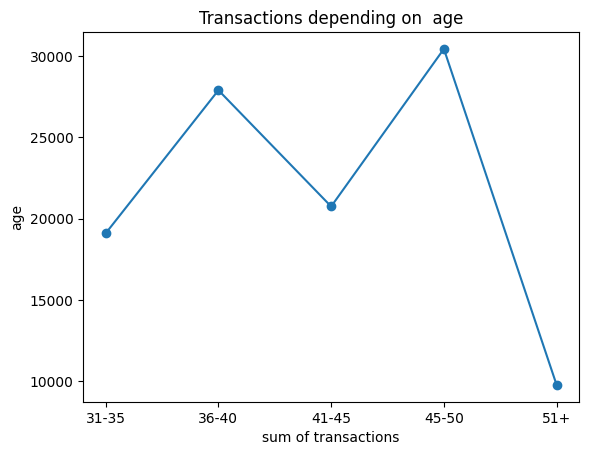

In [13]:
plt.plot(transaction_depend_on_age.index, transaction_depend_on_age["transaction_amount"], marker='o')
plt.xlabel("sum of transactions")
plt.ylabel("age")
plt.title("Transactions depending on  age")
plt.show()